## Weather Conditions in World War Two

### About Dataset

#### Context

While exploring the Aerial Bombing Operations of World War Two dataset, and recalling that the D-Day landings were nearly postponed due to poor weather. Weather reports from the period compare with missions in the bombing operations dataset.

#### Content

The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed, and whether the day included thunder storms or other poor weather conditions.


#### Acknowledgements

The data are hosted on Kaggle, which was taken from the Untied States National Oceanic and Atmospheric Administration National Centres for Environmental Information website.


#### Inspiration 

This dataset is mostly to assist with the analysis of the Aerial Bombing Operations dataset, also hosted on kaggle


#### Question we are trying to answer

Is there a relationship between the daily maximum and minimum temperature? 

Can we predict the maximum temperature given the minimum temperature? 

Linear Regression (predicting a continuous value)

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()
%matplotlib inline

In [5]:
ww2 = pd.read_csv('Summary of Weather.csv', low_memory=False)

In [6]:
ww2.head(10)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001,1942-7-6,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10001,1942-7-8,3.556,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10001,1942-7-10,3.556,NaN,25.555556,21.666667,23.333333,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ww2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

categories = [Date, Precip, Snowfall, PoorWeather, PRCP, SNF, TSHDSBRSGF]

<Axes: >

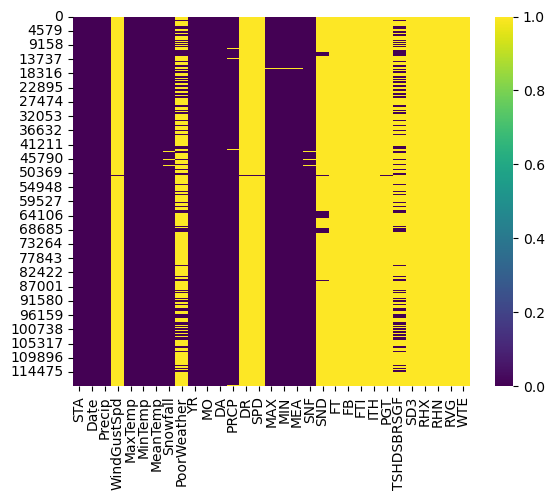

In [9]:
sns.heatmap(data=ww2.isnull(), annot=False, xticklabels=True, cmap='viridis')

This dataset is a mess. To start lets drop the columns that have 0 non-null values

## Data Cleaning and Preprocessing

In [12]:
ww2 = ww2.drop(['FT', 'FB', 'FTI', 'ITH', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE', 'WindGustSpd',
               'PoorWeather', 'PGT', 'SND','DR', 'SPD', 'TSHDSBRSGF'], axis=1)

In [13]:
ww2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   STA       119040 non-null  int64  
 1   Date      119040 non-null  object 
 2   Precip    119040 non-null  object 
 3   MaxTemp   119040 non-null  float64
 4   MinTemp   119040 non-null  float64
 5   MeanTemp  119040 non-null  float64
 6   Snowfall  117877 non-null  object 
 7   YR        119040 non-null  int64  
 8   MO        119040 non-null  int64  
 9   DA        119040 non-null  int64  
 10  PRCP      117108 non-null  object 
 11  MAX       118566 non-null  float64
 12  MIN       118572 non-null  float64
 13  MEA       118542 non-null  float64
 14  SNF       117877 non-null  object 
dtypes: float64(6), int64(4), object(5)
memory usage: 13.6+ MB


In [14]:
ww2['Snowfall'] = pd.to_numeric(ww2['Snowfall'], errors='coerce')
ww2 = ww2.dropna(subset=['Snowfall'])
ww2['Snowfall'] = ww2['Snowfall'].astype(float)

In [15]:
ww2['PRCP'] = pd.to_numeric(ww2['PRCP'], errors='coerce')
ww2 = ww2.dropna(subset=['PRCP'])
ww2['PRCP'] = ww2['PRCP'].astype(float)

In [16]:
ww2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99656 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   STA       99656 non-null  int64  
 1   Date      99656 non-null  object 
 2   Precip    99656 non-null  object 
 3   MaxTemp   99656 non-null  float64
 4   MinTemp   99656 non-null  float64
 5   MeanTemp  99656 non-null  float64
 6   Snowfall  99656 non-null  float64
 7   YR        99656 non-null  int64  
 8   MO        99656 non-null  int64  
 9   DA        99656 non-null  int64  
 10  PRCP      99656 non-null  float64
 11  MAX       99240 non-null  float64
 12  MIN       99252 non-null  float64
 13  MEA       99225 non-null  float64
 14  SNF       99656 non-null  object 
dtypes: float64(8), int64(4), object(3)
memory usage: 12.2+ MB


We were able to remove null values and reduce dimensionality within our dataset.

We will take a look at the categorical variables next to see if they should be passed into our model or not.

First one I want to take a look at is the Date feature. I want to make sure we convert it to a date type

In [18]:
ww2['Date'].head(25)

0      1942-7-1
1      1942-7-2
2      1942-7-3
3      1942-7-4
4      1942-7-5
5      1942-7-6
7      1942-7-8
9     1942-7-10
10    1942-7-11
11    1942-7-12
12    1942-7-13
13    1942-7-14
14    1942-7-15
18    1942-7-19
19    1942-7-20
22    1942-7-23
23    1942-7-24
24    1942-7-25
25    1942-7-26
26    1942-7-27
27    1942-7-28
28    1942-7-29
29    1942-7-30
30    1942-7-31
31     1942-8-1
Name: Date, dtype: object

In [19]:
ww2.Date = pd.to_datetime(ww2.Date)

In [20]:
ww2.Date.head(25)

0    1942-07-01
1    1942-07-02
2    1942-07-03
3    1942-07-04
4    1942-07-05
5    1942-07-06
7    1942-07-08
9    1942-07-10
10   1942-07-11
11   1942-07-12
12   1942-07-13
13   1942-07-14
14   1942-07-15
18   1942-07-19
19   1942-07-20
22   1942-07-23
23   1942-07-24
24   1942-07-25
25   1942-07-26
26   1942-07-27
27   1942-07-28
28   1942-07-29
29   1942-07-30
30   1942-07-31
31   1942-08-01
Name: Date, dtype: datetime64[ns]

In [21]:
ww2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99656 entries, 0 to 119039
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   STA       99656 non-null  int64         
 1   Date      99656 non-null  datetime64[ns]
 2   Precip    99656 non-null  object        
 3   MaxTemp   99656 non-null  float64       
 4   MinTemp   99656 non-null  float64       
 5   MeanTemp  99656 non-null  float64       
 6   Snowfall  99656 non-null  float64       
 7   YR        99656 non-null  int64         
 8   MO        99656 non-null  int64         
 9   DA        99656 non-null  int64         
 10  PRCP      99656 non-null  float64       
 11  MAX       99240 non-null  float64       
 12  MIN       99252 non-null  float64       
 13  MEA       99225 non-null  float64       
 14  SNF       99656 non-null  object        
dtypes: datetime64[ns](1), float64(8), int64(4), object(2)
memory usage: 12.2+ MB


## Feature Extraction of Date column

In [23]:
# Extract features from the datetime column
ww2['Year'] = ww2['Date'].dt.year
ww2['Month'] = ww2['Date'].dt.month
ww2['Day'] = ww2['Date'].dt.dayofweek

Text(0.5, 1.0, 'Value Counts of Month in Dataset')

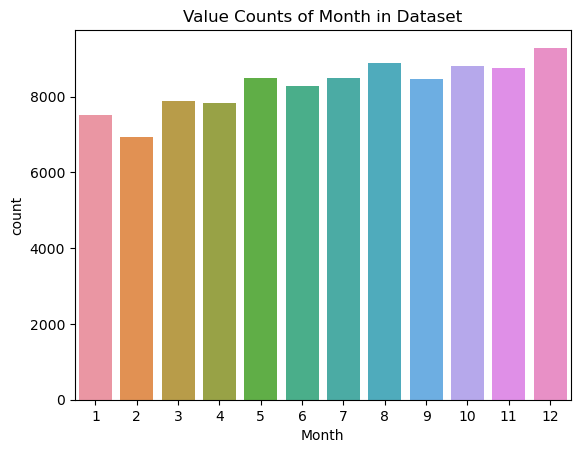

In [24]:
sns.countplot(data=ww2, x='Month')
plt.title('Value Counts of Month in Dataset')

## Back to Data Cleaning and Preprocessing

In [26]:
ww2['Precip'] = pd.to_numeric(ww2['Precip'], errors='coerce')
ww2 = ww2.dropna(subset=['Precip'])
ww2['Precip'] = ww2['Precip'].astype(float)

In [27]:
ww2['SNF'] = pd.to_numeric(ww2['SNF'], errors='coerce')
ww2 = ww2.dropna(subset=['SNF'])
ww2['SNF'] = ww2['SNF'].astype(float)

In [28]:
ww2 = ww2.drop('Date', axis=1)

In [29]:
ww2.dropna(inplace=True)

<Axes: >

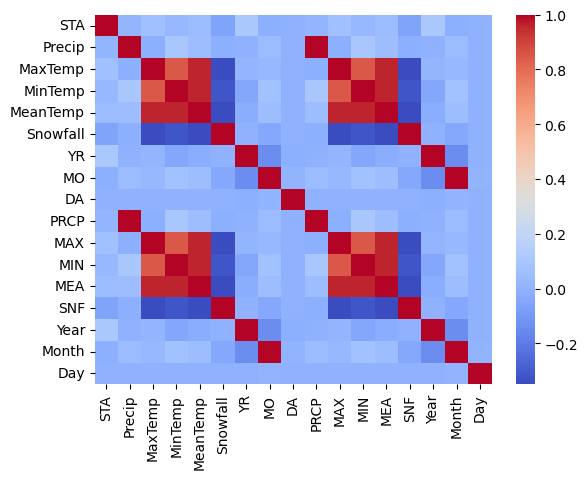

In [30]:
sns.heatmap(data=ww2.corr(), annot=False, xticklabels=True, cmap='coolwarm')

In [31]:
feature_names = ww2.columns

## Scale Our data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
# Scale our data so each feature has a signle unit variance using StandardScaler

scaler = StandardScaler()

scaler.fit(ww2)

scaled_data = scaler.transform(ww2)

## Principal Component Analysis

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)
scaled_data.shape

(99223, 17)

In [37]:
x_pca.shape

(99223, 4)

In [38]:
pca.components_

array([[-2.42217993e-02, -2.82073338e-02, -3.86196363e-01,
        -3.85747379e-01, -4.01031250e-01,  1.97068292e-01,
         1.25450152e-02, -3.37964530e-02,  1.18341484e-03,
        -2.82073338e-02, -3.86196363e-01, -3.85747379e-01,
        -4.01031250e-01,  1.97068292e-01,  1.25450152e-02,
        -3.37964530e-02,  3.84319061e-04],
       [-9.49043186e-02,  1.31356799e-01, -5.21284323e-02,
         1.36988291e-02, -2.01853023e-02,  1.07426383e-02,
        -4.90329482e-01,  4.84067906e-01,  1.10822648e-02,
         1.31356799e-01, -5.21284323e-02,  1.36988291e-02,
        -2.01853023e-02,  1.07426383e-02, -4.90329482e-01,
         4.84067906e-01,  3.98669677e-03],
       [ 4.80543385e-02,  6.77995825e-01, -4.64282563e-02,
         3.08641799e-02, -8.23842432e-03,  4.10857586e-02,
         1.85203324e-01,  1.21880663e-03, -1.49080862e-03,
         6.77995825e-01, -4.64282563e-02,  3.08641799e-02,
        -8.23842432e-03,  4.10857586e-02,  1.85203324e-01,
         1.21880663e-03, -4.2

In [39]:
ww2_comp = pd.DataFrame(pca.components_, columns=feature_names)

<Axes: >

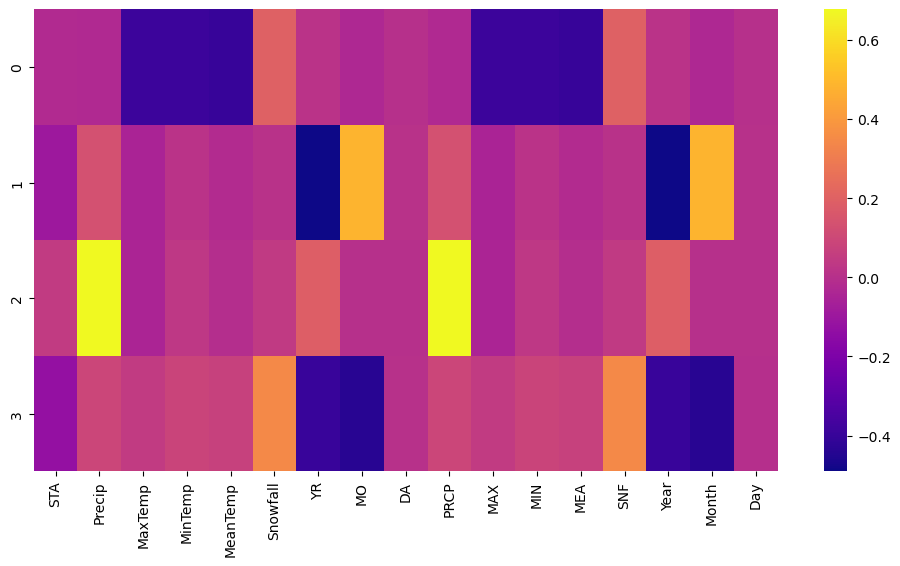

In [40]:
plt.figure(figsize=(12, 6))
sns.heatmap(ww2_comp, cmap='plasma')

## Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing split

X_train, X_test, y_train, y_test = train_test_split(x_pca, ww2.MaxTemp, test_size=0.20, random_state=42)

## Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

print(lm.coef_)



[-2.99907691 -0.40189092 -0.35811045  0.34154726]


In [45]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

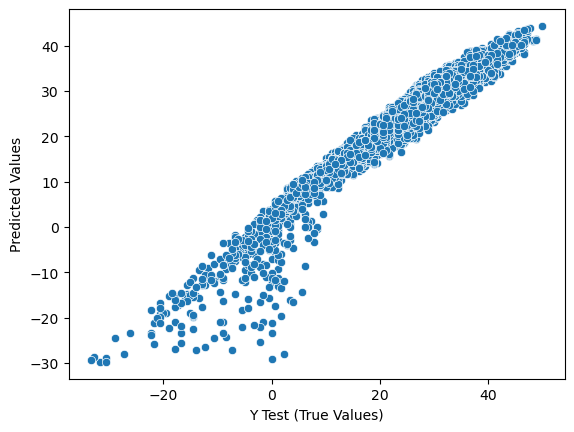

In [46]:
sns.scatterplot(x=y_test, y=predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [48]:
from sklearn import metrics

print(f'MAE: {metrics.mean_absolute_error(y_test, predictions)}')
print(f'MSE: {metrics.mean_squared_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')

MAE: 1.692709727791374
MSE: 5.084518062720452
RMSE: 2.2548875942539692


In [49]:
metrics.explained_variance_score(y_test,predictions) # 92% of the variance is explained, decent model

0.9182843104603179

## Residuals

/tmp/ipykernel_2036/1061164399.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='MaxTemp', ylabel='Density'>

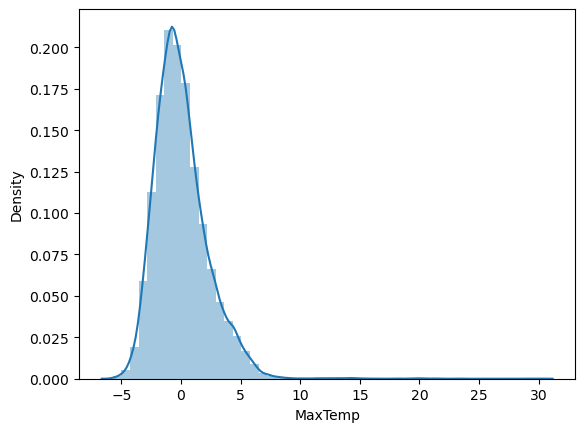

In [51]:
sns.distplot((y_test-predictions),bins=50)

In [52]:
x_pca = pd.DataFrame(x_pca)
cdf = pd.DataFrame(lm.coef_,x_pca.columns,columns=['Coeff'])

In [53]:
cdf

,Coeff
0,-2.999077
1,-0.401891
2,-0.358110
3,0.341547
